In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset (your file)
df = pd.read_csv("insurance.csv")

df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Check Nulls 

In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Check Duplicates

In [62]:
duplicates_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

Number of duplicate rows: 1


## Drop duplicates

In [63]:
print(f"Before shape of data: {df.shape}")
df.drop_duplicates(inplace=True)
print(f"\nNew shape of data: {df.shape}")
print(f"Duplicates left: {df.duplicated().sum()}")

Before shape of data: (1338, 7)

New shape of data: (1337, 7)
Duplicates left: 0


# Encoding

In [64]:

x= df['region'].unique()
y=  df['sex'].unique()
z= df['smoker'].unique()
print(x)
print(y)
print(z)

['southwest' 'southeast' 'northwest' 'northeast']
['female' 'male']
['yes' 'no']


### We use LabelEncoder because it automatic inverse map

In [65]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['sex'] = le.fit_transform(df['sex'])

print("Sex Mapping:")
for i, item in enumerate(le.classes_):
    print(f"{item} --> {i}")


df['smoker'] = le.fit_transform(df['smoker'])

print("\n Smoker Mapping:")
for i, item in enumerate(le.classes_):
    print(f"{item} --> {i}")
print(df.head())

Sex Mapping:
female --> 0
male --> 1

 Smoker Mapping:
no --> 0
yes --> 1
   age  sex     bmi  children  smoker     region      charges
0   19    0  27.900         0       1  southwest  16884.92400
1   18    1  33.770         1       0  southeast   1725.55230
2   28    1  33.000         3       0  southeast   4449.46200
3   33    1  22.705         0       0  northwest  21984.47061
4   32    1  28.880         0       0  northwest   3866.85520


### We use with region --> One-Hot Encoding because Using Label Encoding (0, 1, 2, 3) implies a false hierarchy where 3 > 0, which confuses the model. One-Hot Encoding treats all regions equally without any rank.

In [66]:
df = pd.get_dummies(df, columns=['region'], drop_first=True)
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


# Box Plot to detect Outliers

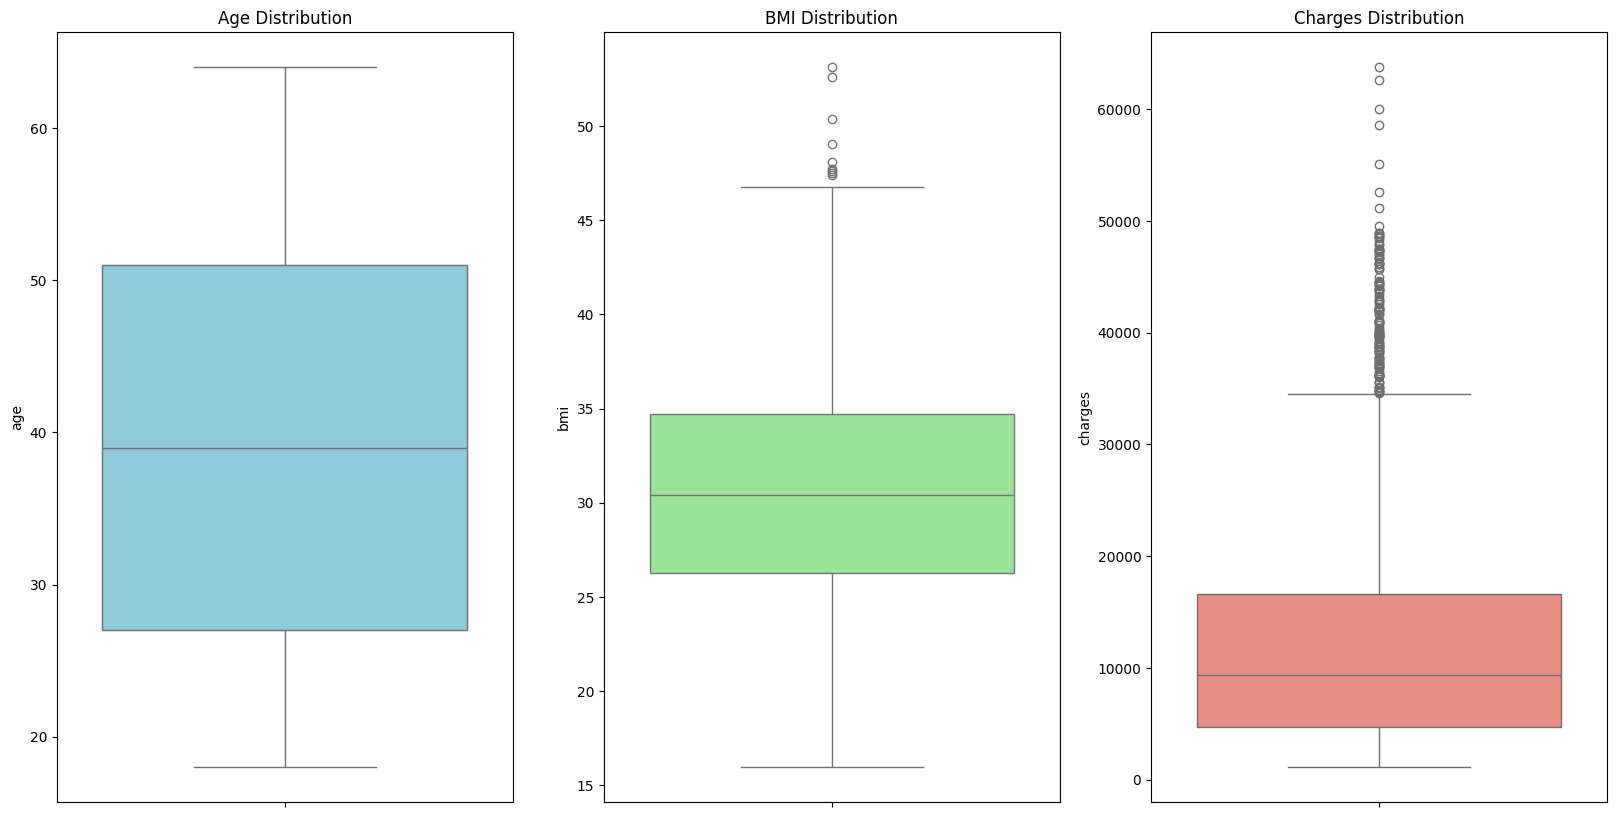

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10 ))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['age'], color='skyblue')
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['bmi'], color='lightgreen')
plt.title('BMI Distribution')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['charges'], color='salmon')
plt.title('Charges Distribution')

plt.show()

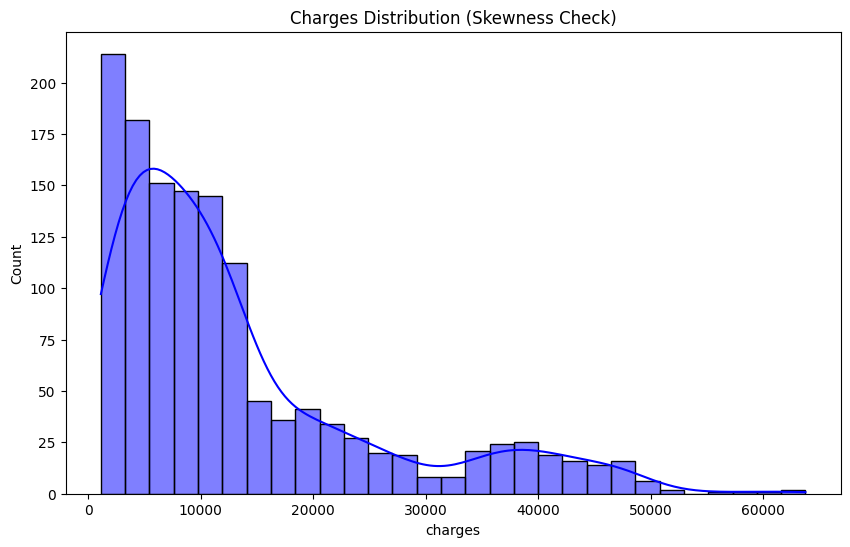

In [68]:
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, color='blue')
plt.title('Charges Distribution (Skewness Check)')
plt.show()

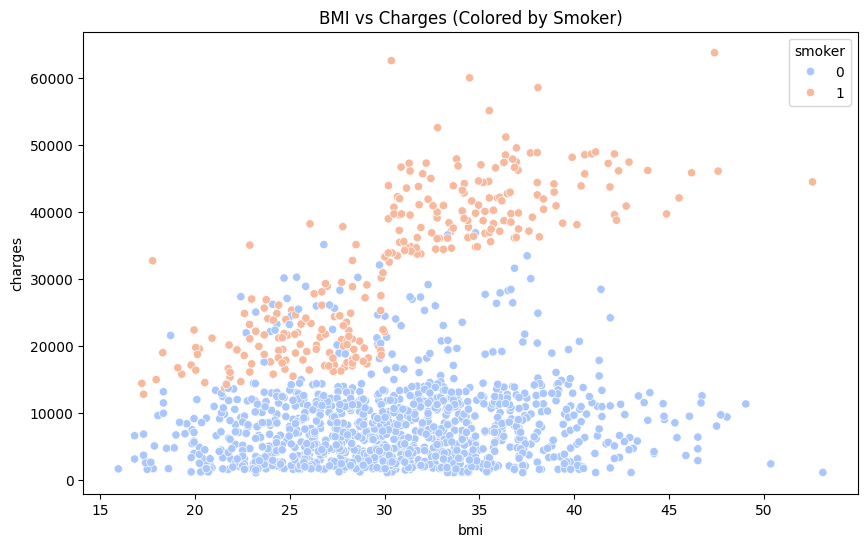

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, palette='coolwarm')
plt.title('BMI vs Charges (Colored by Smoker)')
plt.show()

# Log Transformation 

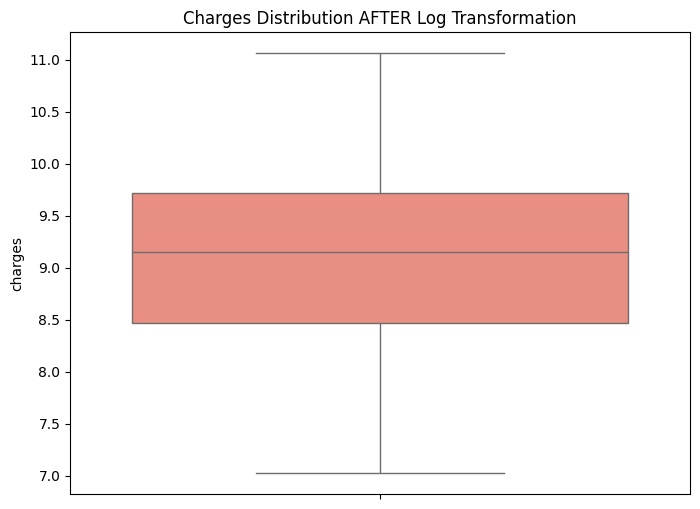

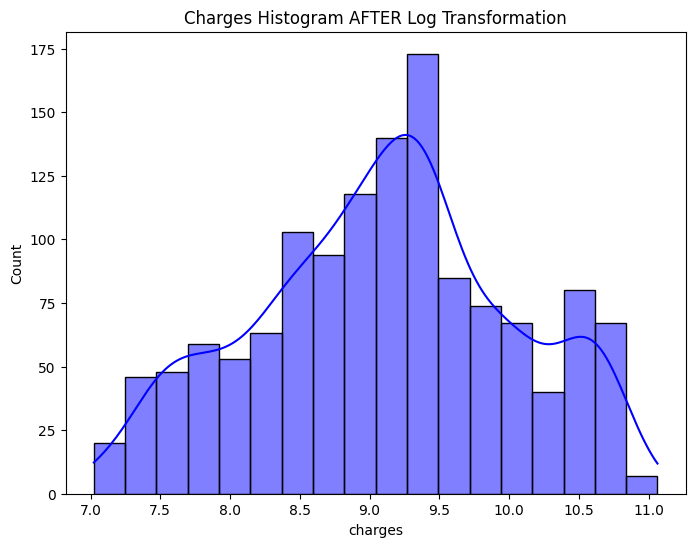

In [70]:
import numpy as np

df['charges'] = np.log1p(df['charges'])

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['charges'], color='salmon')
plt.title('Charges Distribution AFTER Log Transformation')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['charges'], kde=True, color='blue')
plt.title('Charges Histogram AFTER Log Transformation')
plt.show()

## spliting dataset

In [71]:

X = df.drop('charges', axis=1)
Y = np.log1p(df['charges']) 


X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

print(X_train.shape)
print(X_test.shape)

(1069, 8)
(268, 8)


In [36]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,2.373438,False,False,True
1,18,1,33.770,1,0,2.134626,False,True,False
2,28,1,33.000,3,0,2.240791,False,True,False
3,33,1,22.705,0,0,2.397726,True,False,False
4,32,1,28.880,0,0,2.225753,True,False,False


## Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols = ['age', 'bmi', 'children'] 

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_test[num_cols] = scaler.transform(X_test[num_cols])

print(X_train.head())

           age  sex       bmi  children  smoker  region_northwest  \
1114 -1.157680    1 -0.996928 -0.907908       0             False   
968  -1.300619    1 -0.792762  0.766904       0             False   
599   0.914926    0  1.154664  0.766904       0              True   
170   1.701087    1  1.806837 -0.907908       0             False   
275   0.557580    0 -0.651417  0.766904       0             False   

      region_southeast  region_southwest  
1114             False             False  
968              False             False  
599              False             False  
170               True             False  
275              False             False  


# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

lr_model = LinearRegression()

lr_model.fit(X_train, Y_train)

y_pred_log = lr_model.predict(X_test)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)

y_pred_poly_log = poly_model.predict(X_test_poly)

y_pred_poly_final = np.expm1(y_pred_poly_log)
y_test_final = np.expm1(Y_test)

score_poly = r2_score(y_test_final, y_pred_poly_final)
mae_poly = mean_absolute_error(y_test_final, y_pred_poly_final)

print(f" Polynomial Model Accuracy: {score_poly*100:.2f}%")
print(f" New Average Error (MAE): ${mae_poly:.2f}")

🚀 Polynomial Model Accuracy: 88.56%
📉 New Average Error (MAE): $0.19


# KNN

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# -----------------------------
# 1. Columns
# -----------------------------
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker']
region_features = [
    'region_northwest',
    'region_southeast',
    'region_southwest'
]

all_cols = numeric_features + categorical_features + region_features

# -----------------------------
# 2. Preprocessing Pipeline
# -----------------------------
preprocess = ColumnTransformer([
    ("scale", RobustScaler(), all_cols)
])

# -----------------------------
# 3. Full Pipeline
# -----------------------------
knn_pipeline = Pipeline([
    ("prep", preprocess),
    ("select", SelectKBest(score_func=mutual_info_regression)),
    ("knn", KNeighborsRegressor())
])

# -----------------------------
# 4. Parameter Grid
# -----------------------------
param_grid = {
    "select__k": [4, 5, 6],   
    "knn__n_neighbors": [5, 15, 30, 50], 
    "knn__weights": ["uniform", "distance"],  
    "knn__p": [1, 2],          
    "knn__metric": ["minkowski"] 
}


# -----------------------------
# 5. Grid Search
# -----------------------------
grid_search = GridSearchCV(
    estimator=knn_pipeline,
    param_grid=param_grid,
    scoring="r2",
    cv=10,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, Y_train)

# -----------------------------
# 6. Best Model Results
# -----------------------------
print("\nBest Params:", grid_search.best_params_)
best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(X_test)

r2 = r2_score(Y_test, y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))

print(f"\n Final KNN R²: {r2:.4f}")
print(f" RMSE: {rmse:.4f}")


Fitting 10 folds for each of 48 candidates, totalling 480 fits

Best Params: {'knn__metric': 'minkowski', 'knn__n_neighbors': 30, 'knn__p': 2, 'knn__weights': 'uniform', 'select__k': 4}

🔥 Final KNN R²: 0.8513
📉 RMSE: 0.0371


In [ ]:
y_pred_knn_log = grid_search.predict(X_test)
y_pred_knn_final = np.expm1(y_pred_knn_log)

comparison_df = pd.DataFrame({
    'Actual Charges': y_test_final,
    'Polynomial Prediction': y_pred_poly_final,
    'KNN Optimized Prediction': y_pred_knn_final,
})

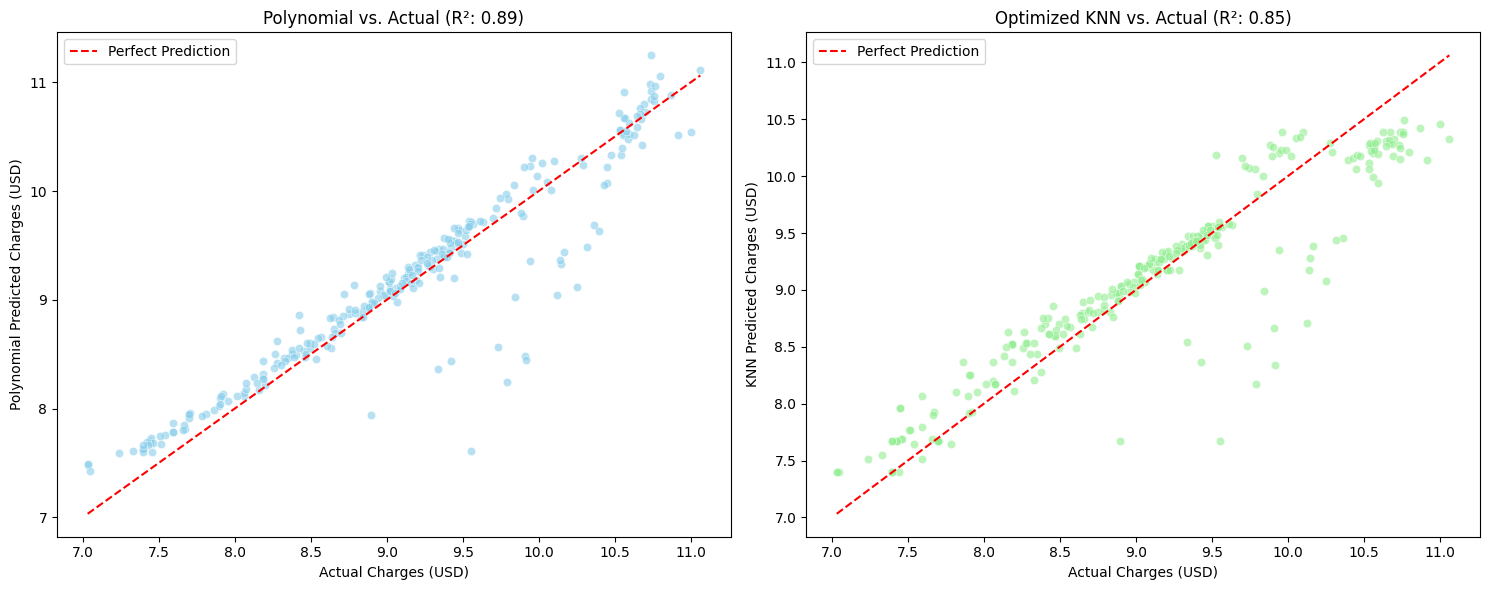

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x=y_test_final, y=y_test_final, color='red', linestyle='--', label='Perfect Prediction')
sns.scatterplot(x=y_test_final, y=y_pred_poly_final, color='skyblue', alpha=0.6)
plt.title(f'Polynomial vs. Actual (R²: {score_poly:.2f})')
plt.xlabel('Actual Charges (USD)')
plt.ylabel('Polynomial Predicted Charges (USD)')
plt.legend()


plt.subplot(1, 2, 2)
sns.lineplot(x=y_test_final, y=y_test_final, color='red', linestyle='--', label='Perfect Prediction')
sns.scatterplot(x=y_test_final, y=y_pred_knn_final, color='lightgreen', alpha=0.6)
plt.title(f'Optimized KNN vs. Actual (R²: {r2:.2f})')
plt.xlabel('Actual Charges (USD)')
plt.ylabel('KNN Predicted Charges (USD)')
plt.legend()


plt.tight_layout()
plt.show()

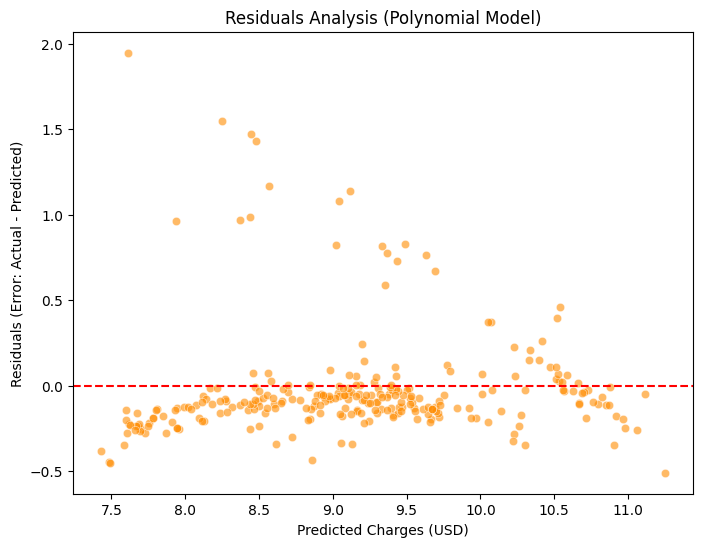

In [ ]:
residuals_poly = y_test_final - y_pred_poly_final

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_poly_final, y=residuals_poly, color='darkorange', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Analysis (Polynomial Model)')
plt.xlabel('Predicted Charges (USD)')
plt.ylabel('Residuals (Error: Actual - Predicted)')
plt.show()

